In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [24]:
df_netflix=pd.read_csv('/content/netflix_titles.csv')

In [3]:
df_netflix.columns




Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df_netflix.shape

(8807, 12)

In [8]:
#identify missing data
df_netflix.isnull().sum().sort_values(ascending=False)

,0
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


In [9]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
for column in df_netflix.columns:

 p=df_netflix[column].isnull().mean()
 print(column +' '+ '=' +' '+ str(round(p*100,2))+'%')

show_id = 0.0%
type = 0.0%
title = 0.0%
director = 29.91%
cast = 9.37%
country = 9.44%
date_added = 0.11%
release_year = 0.0%
rating = 0.05%
duration = 0.03%
listed_in = 0.0%
description = 0.0%


In [11]:
df_netflix.drop('director',axis=1) #droping columns


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
null_director=df_netflix[df_netflix['director'].isnull()].index

In [13]:
df_netflix.drop(null_director,axis=0).isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,473
country,422
date_added,0
release_year,0
rating,1
duration,3


In [14]:
df_netflix[~(df_netflix['director'].isnull())].isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,473
country,422
date_added,0
release_year,0
rating,1
duration,3


In [15]:
df_netflix=df_netflix.dropna(subset=['director'])

In [16]:
df_netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,473
country,422
date_added,0
release_year,0
rating,1
duration,3


In [17]:
#fill missing data
mode=''.join(df_netflix['rating'].mode())


In [19]:
df_netflix['rating'].fillna(mode,inplace=True)

In [21]:
df_netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,473
country,422
date_added,0
release_year,0
rating,0
duration,3


In [23]:
#arbitary no
df_netflix['duration'].fillna(0,inplace=True)

In [24]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
#bacckward ,forward
#df_netflix.fillna(method="bfill")
df_netflix.fillna(method="ffill")

/tmp/ipython-input-3007469455.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_netflix.fillna(method="ffill")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [27]:
df_netflix['duration'].fillna('0',inplace=True)

In [28]:
df_netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,0


In [46]:
df_movie=df_netflix[df_netflix['type']=='Movie']
df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int)

/tmp/ipython-input-1279412415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute']=df_movie['duration'].str.split(expand=True)[0].astype(int)


In [47]:
df_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91


In [43]:
df_movie['date_added'].str.split(',',expand=True)[1]


,1
0,2021
6,2021
7,2021
9,2021
12,2021
...,...
8801,2016
8802,2019
8804,2019
8805,2020


In [44]:
df_movie['date_added'].str.extract('(\d{4})')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3604024733.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_movie['date_added'].str.extract('(\d{4})')


,0
0,2021
6,2021
7,2021
9,2021
12,2021
...,...
8801,2016
8802,2019
8804,2019
8805,2020


<Axes: ylabel='Frequency'>

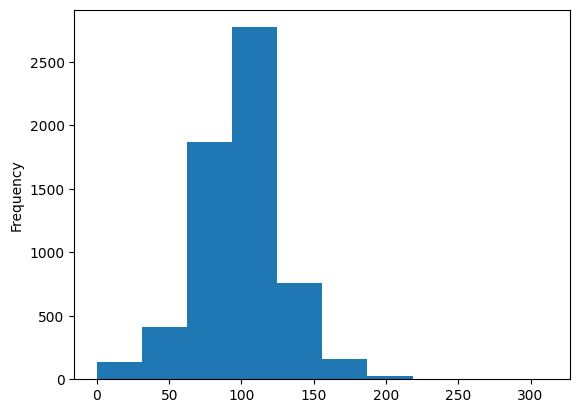

In [53]:
#identify outliers
#1 histogram

df_movie['minute'].plot(kind='hist',bins=10)

In [54]:
#get ar range
df_movie['minute'].value_counts(bins=10).sort_index()

,count
"(-0.313, 31.2]",135
"(31.2, 62.4]",410
"(62.4, 93.6]",1867
"(93.6, 124.8]",2772
"(124.8, 156.0]",766
"(156.0, 187.2]",150
"(187.2, 218.4]",22
"(218.4, 249.6]",6
"(249.6, 280.8]",2
"(280.8, 312.0]",1


In [55]:
#dealing with outliers
df_movie[(df_movie['minute']>31) & (df_movie['minute']<218 )]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


<Axes: >

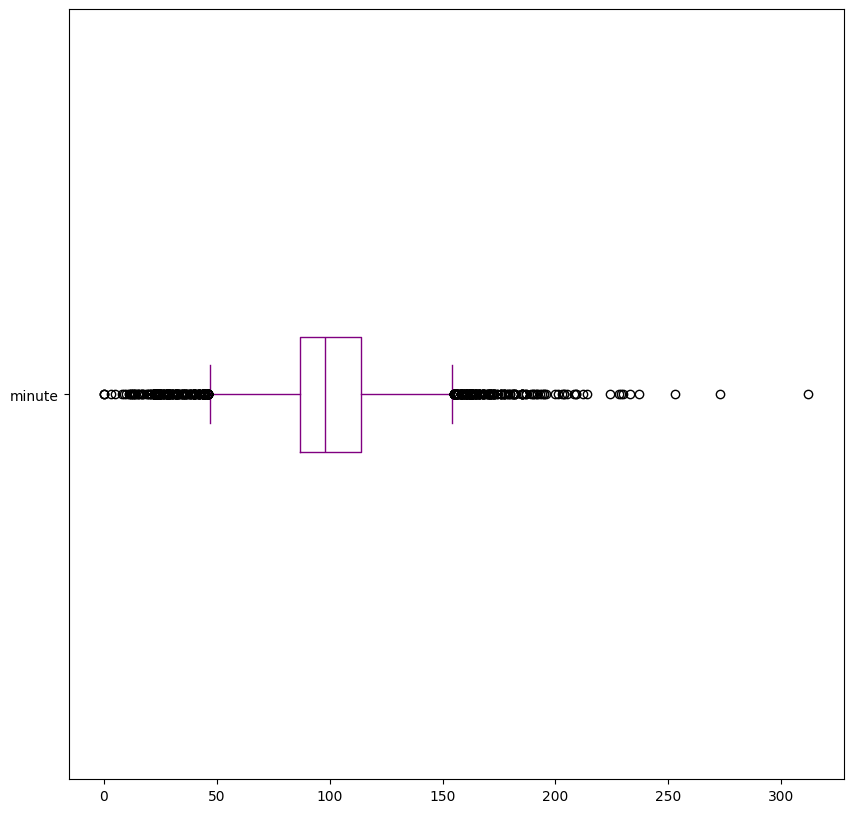

In [59]:
#using boxplot
df_movie['minute'].plot(kind='box',vert=False,color='purple',figsize=(10,10))

In [62]:
#IQR=Q3=Q1
#Q1-1.5IQR
df_movie['minute'].describe()
min_boxplot=87.000000-1.5*(114-87)
max_boxplot=87.000000+1.5*(114-87)
print(min_boxplot)
print(max_boxplot)

46.5
127.5


In [63]:
df_movie[(df_movie['minute']>46.5) & (df_movie['minute']<127.5 )]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,120
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [66]:
df_movie['rating'].value_counts()

,count
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


<Axes: xlabel='rating'>

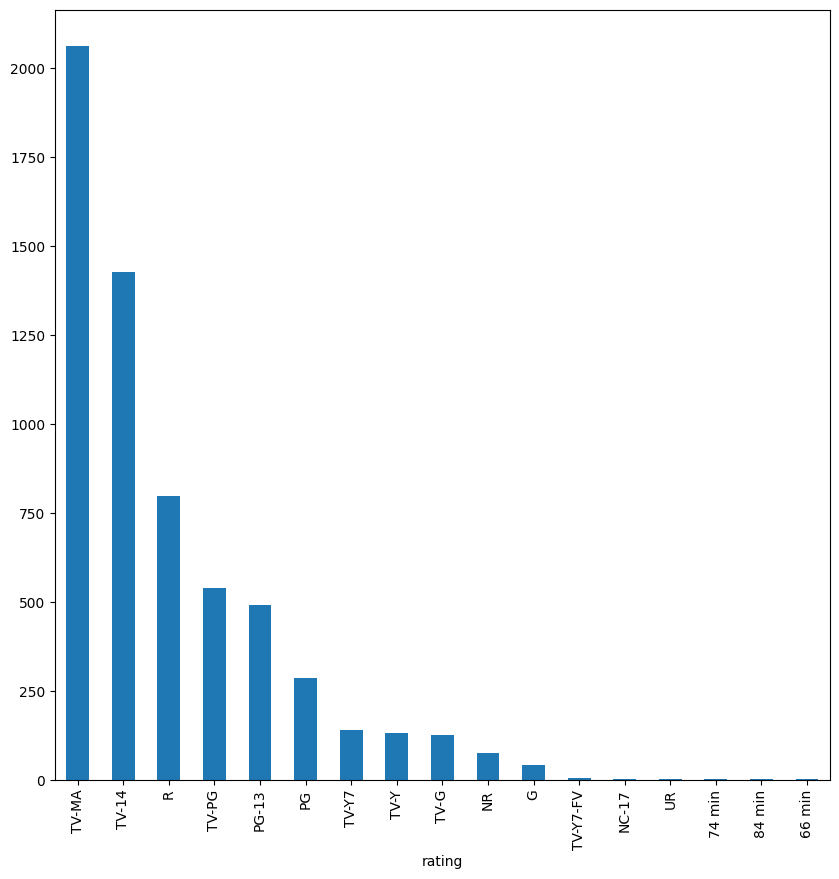

In [65]:
df_movie['rating'].value_counts().plot(kind='bar',figsize=(10,10))

In [69]:
#filter
df_movie[df_movie('rating')==['TV-Y7-FV',
'NC-17',
'UR',
'74 min',
'84 min',
'66 min'
]]

TypeError: 'DataFrame' object is not callable

In [72]:
rating_to_filter=['TV-Y7-FV','NC-17','UR','74 min','84 min'	,'66 min'	]

In [76]:
df_movie = df_movie[~df_movie['rating'].isin(rating_to_filter)]

In [77]:
df_movie['rating'].value_counts()

,count
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


In [83]:
#text normalization
df_movie['title']=df_movie['title'].str.upper()
df_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,DICK JOHNSON IS DEAD,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,MY LITTLE PONY: A NEW GENERATION,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91


In [85]:
df_movie['title']=df_movie['title'].apply(lambda x:x.title())
df_movie.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90


In [88]:
movie_title=' Titanic   '
print(movie_title.lstrip())
print(movie_title.rstrip())
print(movie_title.strip())

Titanic   
 Titanic
Titanic


In [91]:
df_movie['title']=df_movie['title'].str.strip()

In [93]:
df_movie['title'].str.replace('[^\w\s]','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-1827113345.py:1: SyntaxWarning: invalid escape sequence '\w'
  df_movie['title'].str.replace('[^\w\s]','',regex=True)


,title
0,Dick Johnson Is Dead
6,My Little Pony A New Generation
7,Sankofa
9,The Starling
12,Je Suis Karl
...,...
8801,Zinzana
8802,Zodiac
8804,Zombieland
8805,Zoom


In [94]:
df_movie['title'].replace('[^\w\s]','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-590658271.py:1: SyntaxWarning: invalid escape sequence '\w'
  df_movie['title'].replace('[^\w\s]','',regex=True)


,title
0,Dick Johnson Is Dead
6,My Little Pony A New Generation
7,Sankofa
9,The Starling
12,Je Suis Karl
...,...
8801,Zinzana
8802,Zodiac
8804,Zombieland
8805,Zoom


In [96]:
import re

In [97]:
df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-4266743089.py:1: SyntaxWarning: invalid escape sequence '\w'
  df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))


,title
0,Dick Johnson Is Dead
6,My Little Pony A New Generation
7,Sankofa
9,The Starling
12,Je Suis Karl
...,...
8801,Zinzana
8802,Zodiac
8804,Zombieland
8805,Zoom
